In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from collections import Counter
from numpy import sort
from xgboost import plot_importance,XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,mean_squared_error
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from xgboost import plot_importance
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef
import datetime
from sklearn.preprocessing  import StandardScaler
from sklearn.linear_model  import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix

Folder_2 :
train,  Counter({0: 13543, 1: 60})
valid,  Counter({0: 2032, 1: 10})
test,  Counter({0: 3773, 1: 17})
[[11914  1629]
 [    0    60]] 
 TNR =  1.0
Accuracy:  0.8802470043372785
[[1779  253]
 [   4    6]] 
 TNR =  0.6
Accuracy:  0.8741429970617042
[[3306  467]
 [   9    8]] 
 TNR =  0.47058823529411764
Accuracy:  0.8744063324538258
執行時間： 0:01:38.087112


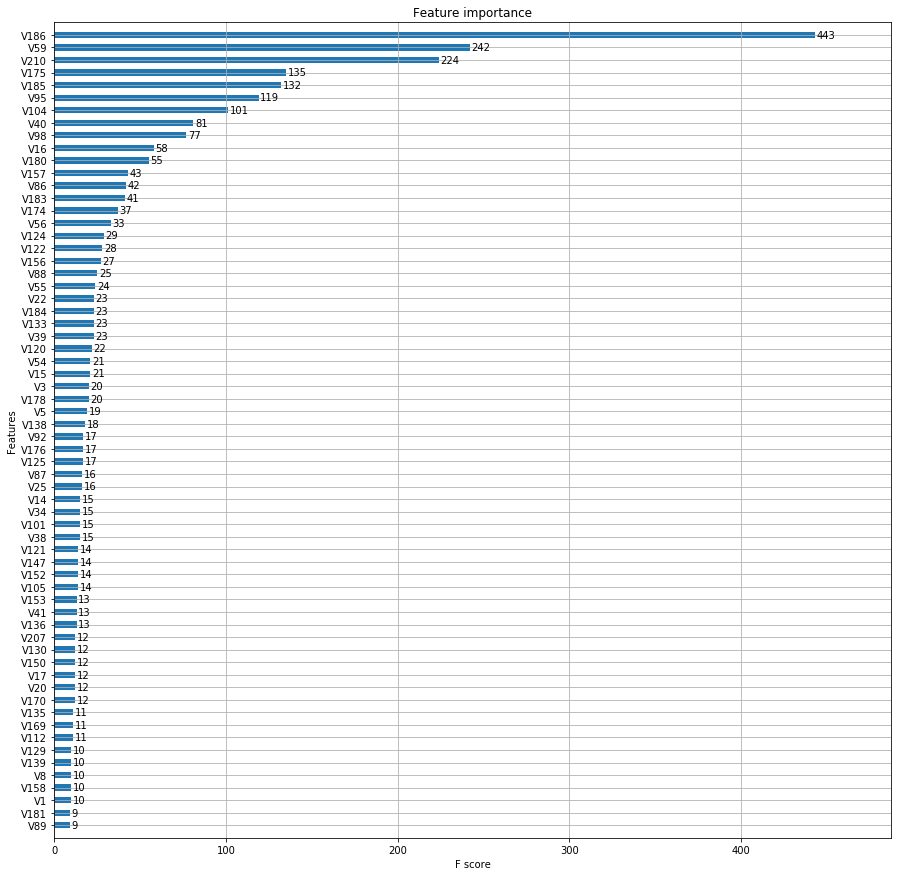

執行時間： 0:01:39.417208 



In [10]:
#folder 2 
# Data preprocess
df=pd.read_csv("C:/Users/saes0/Desktop/Sensortek/clean_data.csv")
result = ['fail','pass']
train = []; valid = []; test= [];
for i in result:
    for j in range(len(Counter(df['Class']))):
        EF_df = df[(df['Class']==j+1) & (df['Result']== i)]
        x = EF_df.drop(['Result'],axis=1)
        y = EF_df['Result']
        EF_x_train,EF_x_test1,EF_y_train,EF_y_test1 = train_test_split(x,y,test_size=0.3,random_state=20190916)
        EF_x_test,EF_x_valid,EF_y_test,EF_y_valid = train_test_split(EF_x_test1,EF_y_test1,test_size=0.35,random_state=20190916)
        EF_train = pd.concat([EF_x_train,EF_y_train],axis = 1); EF_valid = pd.concat([EF_x_valid,EF_y_valid],axis = 1) ; EF_test = pd.concat([EF_x_test,EF_y_test],axis = 1)
        train.append(EF_train);valid.append(EF_valid);test.append(EF_test)
LR_train = pd.concat([pd.concat(train),pd.concat(valid)])
LR_test = pd.concat(test)
XGB_train = pd.concat(train)
XGB_valid = pd.concat(valid)
XGB_test = pd.concat(test)

start = datetime.datetime.now()
size_mapping = {'pass':0, 'fail':1}
x_train = XGB_train[XGB_train['Class']==2]
x_train = x_train.drop(['Flag','Result','Class'],axis = 1)
y_train = XGB_train[XGB_train['Class']==2]
y_train = y_train['Result'].map(size_mapping)
x_valid = XGB_valid[XGB_valid['Class']==2]
x_valid = x_valid.drop(['Flag','Result','Class'],axis = 1)
y_valid = XGB_valid[XGB_valid['Class']==2]
y_valid = y_valid['Result'].map(size_mapping)
x_test = XGB_test[XGB_test['Class']==2]
x_test = x_test.drop(['Flag','Result','Class'],axis = 1)
y_test = XGB_test[XGB_test['Class']==2]
y_test = y_test['Result'].map(size_mapping)
print('Folder_2 :')
print("train, ", Counter(y_train))
print("valid, ", Counter(y_valid))
print("test, ", Counter(y_test))

d_train = xgb.DMatrix(data = np.array(x_train),label = np.array(y_train),feature_names=list(x_train))
d_valid = xgb.DMatrix(data = np.array(x_valid),label = np.array(y_valid),feature_names=list(x_valid))
d_test = xgb.DMatrix(data = np.array(x_test), label = np.array(y_test), feature_names=list(x_test))
counter = Counter(y_train)
estimate = counter[0] / counter[1]
params = {'booster': 'gbtree',
          'objective': 'binary:logistic',
          'learning_rate': 0.003,
          'subsample': 0.8,
          'colsample_bytree': 0.8,
          'max_depth': 3,
          'min_child_weight': 1,
          'gamma': 0.0,
          'reg_alpha': 0.005,
          'scale_pos_weight': 840.7166666666667,
          }
cv_model = xgb.cv(params = params, dtrain = d_train, metrics=["logloss"],
                nfold=5, num_boost_round=500, verbose_eval = None,
                 early_stopping_rounds=20 , maximize=False)
cn = cv_model.index[-1] #抓幾 round
xgb_model = xgb.train(params, d_train, num_boost_round = cn)

preds_train = np.round(xgb_model.predict(d_train),0)
a=confusion_matrix(y_train,preds_train)
print(confusion_matrix(y_train,preds_train),'\n','TNR = ',a[1,1]/sum(a[1]))
print ("Accuracy: ",accuracy_score(y_train,preds_train))
preds_valid = np.round(xgb_model.predict(d_valid),0)
a=confusion_matrix(y_valid,preds_valid)
print(confusion_matrix(y_valid,preds_valid),'\n','TNR = ',a[1,1]/sum(a[1]))
print ("Accuracy: ",accuracy_score(y_valid,preds_valid))
preds_test = np.round(xgb_model.predict(d_test),0)
b = confusion_matrix(y_test,preds_test)
print(confusion_matrix(y_test,preds_test),'\n','TNR = ',b[1,1]/sum(b[1]))
print ("Accuracy: ",accuracy_score(y_test,preds_test))
end = datetime.datetime.now()
print("執行時間：", end - start)

fig,ax = plt.subplots(figsize=(15,15))
ax = plot_importance(xgb_model,
                height=0.5,
                ax=ax,
                max_num_features=64)
plt.show()
end = datetime.datetime.now()
print("執行時間：", end - start,"\n")

train,  Counter({0: 179163, 1: 1964})
valid,  Counter({0: 26775, 1: 291})
test,  Counter({0: 51485, 1: 564})
Original_Scale_pos_weight =  91.32505543237251 TNR =  0.697594501718213 Acc =  0.9687430724894702
1 _round_Scale_pos_weight =  94.32505543237251 TNR =  0.7044673539518901 Acc =  0.9675977240818739
2 _round_Scale_pos_weight =  97.32505543237251 TNR =  0.711340206185567 Acc =  0.9669326830710117
3 _round_Scale_pos_weight =  100.32505543237251 TNR =  0.7147766323024055 Acc =  0.9656395477721126
4 _round_Scale_pos_weight =  103.32505543237251 TNR =  0.718213058419244 Acc =  0.9650484002069016
5 _round_Scale_pos_weight =  106.32505543237251 TNR =  0.718213058419244 Acc =  0.9644572526416907
6 _round_Scale_pos_weight =  109.32505543237251 TNR =  0.718213058419244 Acc =  0.9638661050764797
7 _round_Scale_pos_weight =  112.32505543237251 TNR =  0.7216494845360825 Acc =  0.9630902238971403
8 _round_Scale_pos_weight =  115.32505543237251 TNR =  0.7216494845360825 Acc =  0.9622773959949752

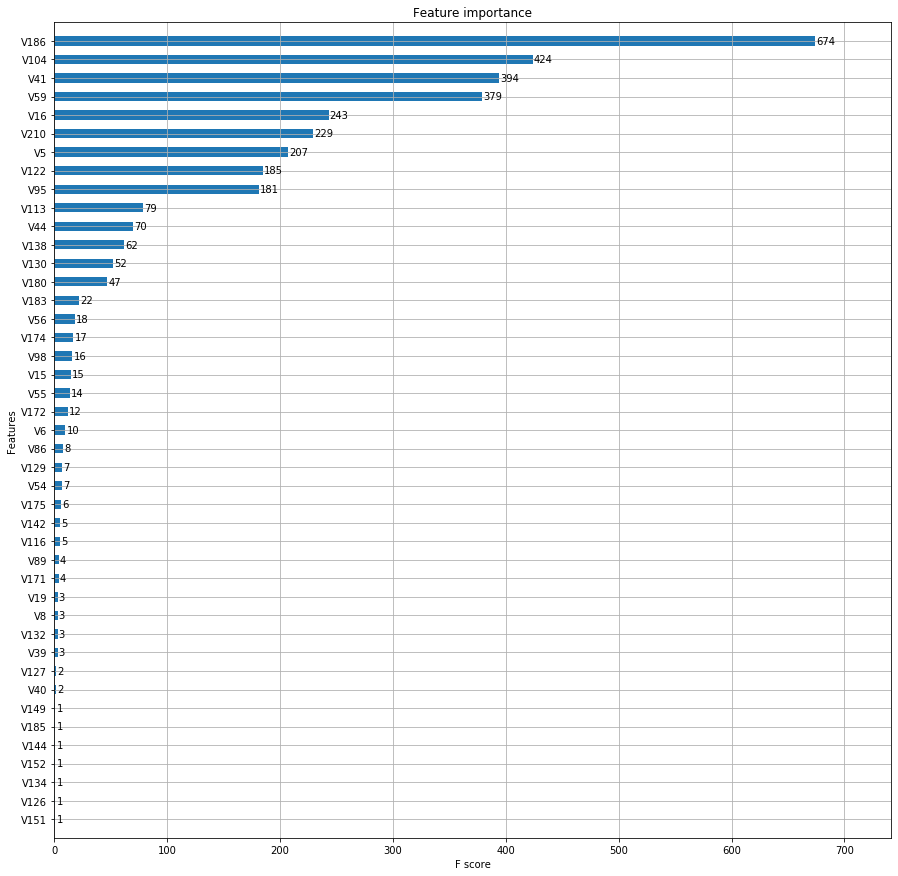

執行時間： 1 day, 1:50:40.272642 



In [43]:
start = datetime.datetime.now()
df=pd.read_csv("C:/Users/saes0/Desktop/Sensortek/clean_data.csv")
df=df[['V186',"V59","V41","V95","V104","V130",'V113', 'V122', 'V16', 'V138', 'V98', 
      'V44', 'V55', 'V210', 'V5','V185','V174','V184','V144','V157','V175','V53','V39',
      'V15','V126','V86','V56','V149','V180','V40','V127','V89','V85','V8','V45','V183','V142',
      'V6','V129','V171','V147','V152','V134','V172','V151','V84','V116','V19','V54','V137','V123','V132',
      'V154','Result','Class','Flag']]
x = df.drop(['Result','Class'],axis=1)
y = df['Result']
size_mapping = {'pass':0, 'fail':1}
y = y.map(size_mapping)
x_train1,x_test1,y_train1,y_test = train_test_split(x,y,test_size=0.2,random_state=20190916)
x_train1,x_valid1,y_train,y_valid = train_test_split(x_train1,y_train1,test_size=0.13,random_state=20190916)
x_train,x_valid,x_test = x_train1.drop(['Flag'],axis=1),x_valid1.drop(['Flag'],axis=1),x_test1.drop(['Flag'],axis=1)
print("train, ", Counter(y_train))
print("valid, ", Counter(y_valid))
print("test, ", Counter(y_test))

d_train = xgb.DMatrix(data = np.array(x_train),label = np.array(y_train),feature_names=list(x_train))
d_valid = xgb.DMatrix(data = np.array(x_valid), label = np.array(y_valid), feature_names=list(x_valid))
d_test = xgb.DMatrix(data = np.array(x_test), label = np.array(y_test), feature_names=list(x_test))
counter = Counter(y_train1)
estimate = counter[0] / counter[1]

params = {'booster': 'gbtree',
          'objective': 'binary:logistic',
          'learning_rate': 0.003,
          'subsample': 0.8,
          'colsample_bytree': 0.8,
          'max_depth': 3,
          'min_child_weight': 1,
          'gamma': 0.0,
          'reg_alpha': 0.005,
          'scale_pos_weight': estimate,
          }
cv_model = xgb.cv(params = params, dtrain = d_train, metrics=["logloss"],
           nfold=5, num_boost_round=500, verbose_eval = None,
            early_stopping_rounds=20 , maximize=False)
cn = cv_model.index[-1] #抓幾 round
xgb_model = xgb.train(params, d_train, num_boost_round = cn)
preds_valid = np.round(xgb_model.predict(d_valid),0)
b = confusion_matrix(y_valid,preds_valid)
b_TNR = b[1,1]/sum(b[1])
b_Acc = accuracy_score(y_valid,preds_valid)
print('Original_Scale_pos_weight = ',estimate, 'TNR = ',b_TNR, 'Acc = ', b_Acc )
c=0 ; Diff = [abs(b_TNR-b_Acc)] ; B_TNR = [b_TNR] ; B_ACC = [b_Acc] ; Esi = [estimate]; XGB_model= [xgb_model]; Con_b = [b] 

while (b_TNR < b_Acc):
    estimate = estimate + 3
    params = {'booster': 'gbtree',
              'objective': 'binary:logistic',
              'learning_rate': 0.003,
              'subsample': 0.8,
              'colsample_bytree': 0.8,
              'max_depth': 3,
              'min_child_weight': 1,
              'gamma': 0.0,
              'reg_alpha': 0.005,
              'scale_pos_weight': estimate,
                }

    cv_model = xgb.cv(params = params, dtrain = d_train, metrics=["logloss"],
               nfold=5, num_boost_round=500, verbose_eval = None,early_stopping_rounds=20 , maximize=False)
    cn = cv_model.index[-1] #抓幾 round
    xgb_model = xgb.train(params, d_train, num_boost_round = cn)

    preds_valid = np.round(xgb_model.predict(d_valid),0)
    b=confusion_matrix(y_valid,preds_valid)
    b_Acc = accuracy_score(y_valid,preds_valid)
    b_TNR = b[1,1]/sum(b[1])
    diff = abs(b_TNR-b_Acc)
    print(c+1,'_round_Scale_pos_weight = ',estimate, 'TNR = ',b_TNR, 'Acc = ', b_Acc )
    Diff.append(diff) ; B_TNR.append(b_TNR) ; B_ACC.append(b_Acc) ; Esi.append(estimate) ; XGB_model.append(xgb_model) ; Con_b.append(b) 
    c = c+1
    
    if b_TNR ==0:
        Min_diff_pos = Diff.index(min(Diff))
        preds_train = np.round(XGB_model[Min_diff_pos].predict(d_train),0)
        a = confusion_matrix(y_train,preds_train)
        a_TNR = a[1,1]/sum(a[1])
        a_Acc = accuracy_score(y_train,preds_train)
        preds_test = np.round(XGB_model[Min_diff_pos].predict(d_test),0)
        t = confusion_matrix(y_test,preds_test)
        t_TNR = t[1,1]/sum(t[1])
        t_Acc = accuracy_score(y_test,preds_test)
        print("Min_diff_pos :", Min_diff_pos)
        print('Balanced Estimate: %.3f' % Esi[Min_diff_pos])
        print("\n","Train set :","\n", a ,'\n','TNR = ',a_TNR)
        print("XGB accuracy score: ",round(a_Acc,3))
        print("\n","Valid set :","\n",Con_b[Min_diff_pos] ,'\n','TNR = ',B_TNR[Min_diff_pos])
        print("XGB accuracy score: ",round(B_ACC[Min_diff_pos],3))
        print("\n","Test set :","\n",t,'\n','TNR = ',t_TNR)
        print("XGB accuracy score: ",round(t_Acc,3))
        fig,ax = plt.subplots(figsize=(15,15))
        ax = plot_importance(XGB_model[Min_diff_pos],
                        height=0.5,
                        ax=ax,
                        max_num_features=64)
        plt.show()

        end = datetime.datetime.now()
        print("執行時間：", end - start,"\n")
        break
        
    if  b_TNR >= b_Acc:
            Min_diff_pos = Diff.index(min(Diff))
            preds_train = np.round(XGB_model[Min_diff_pos].predict(d_train),0)
            a = confusion_matrix(y_train,preds_train)
            a_TNR = a[1,1]/sum(a[1])
            a_Acc = accuracy_score(y_train,preds_train)
            preds_test = np.round(XGB_model[Min_diff_pos].predict(d_test),0)
            t = confusion_matrix(y_test,preds_test)
            t_TNR = t[1,1]/sum(t[1])
            t_Acc = accuracy_score(y_test,preds_test)
            print("Min_diff_pos :", Min_diff_pos)
            print('Balanced Estimate: %.3f' % Esi[Min_diff_pos])
            print("\n","Train set :","\n", a ,'\n','TNR = ',a_TNR)
            print("XGB accuracy score: ",round(a_Acc,3))
            print("\n","Valid set :","\n",Con_b[Min_diff_pos] ,'\n','TNR = ',B_TNR[Min_diff_pos])
            print("XGB accuracy score: ",round(B_ACC[Min_diff_pos],3))
            print("\n","Test set :","\n",t,'\n','TNR = ',t_TNR)
            print("XGB accuracy score: ",round(t_Acc,3))
            fig,ax = plt.subplots(figsize=(15,15))
            ax = plot_importance(XGB_model[Min_diff_pos],
                            height=0.5,
                            ax=ax,
                            max_num_features=64)
            plt.show()

            end = datetime.datetime.now()
            print("執行時間：", end - start,"\n")
            break

train,  Counter({0: 120036, 1: 1936})
valid,  Counter({0: 17950, 1: 276})
test,  Counter({0: 34488, 1: 562})
Original_Scale_pos_weight =  62.38065099457504 TNR =  0.7427536231884058 Acc =  0.9703171293756172
1 _round_Scale_pos_weight =  65.38065099457503 TNR =  0.7427536231884058 Acc =  0.9685613958081861
2 _round_Scale_pos_weight =  68.38065099457503 TNR =  0.75 Acc =  0.9668605289147372
3 _round_Scale_pos_weight =  71.38065099457503 TNR =  0.7536231884057971 Acc =  0.9654888620651816
4 _round_Scale_pos_weight =  74.38065099457503 TNR =  0.7536231884057971 Acc =  0.9641720618896082
5 _round_Scale_pos_weight =  77.38065099457503 TNR =  0.7536231884057971 Acc =  0.9618127949083727
6 _round_Scale_pos_weight =  80.38065099457503 TNR =  0.7536231884057971 Acc =  0.9605508614067815
7 _round_Scale_pos_weight =  83.38065099457503 TNR =  0.7572463768115942 Acc =  0.9592889279051904
8 _round_Scale_pos_weight =  86.38065099457503 TNR =  0.7644927536231884 Acc =  0.9583561944474925
9 _round_Scale

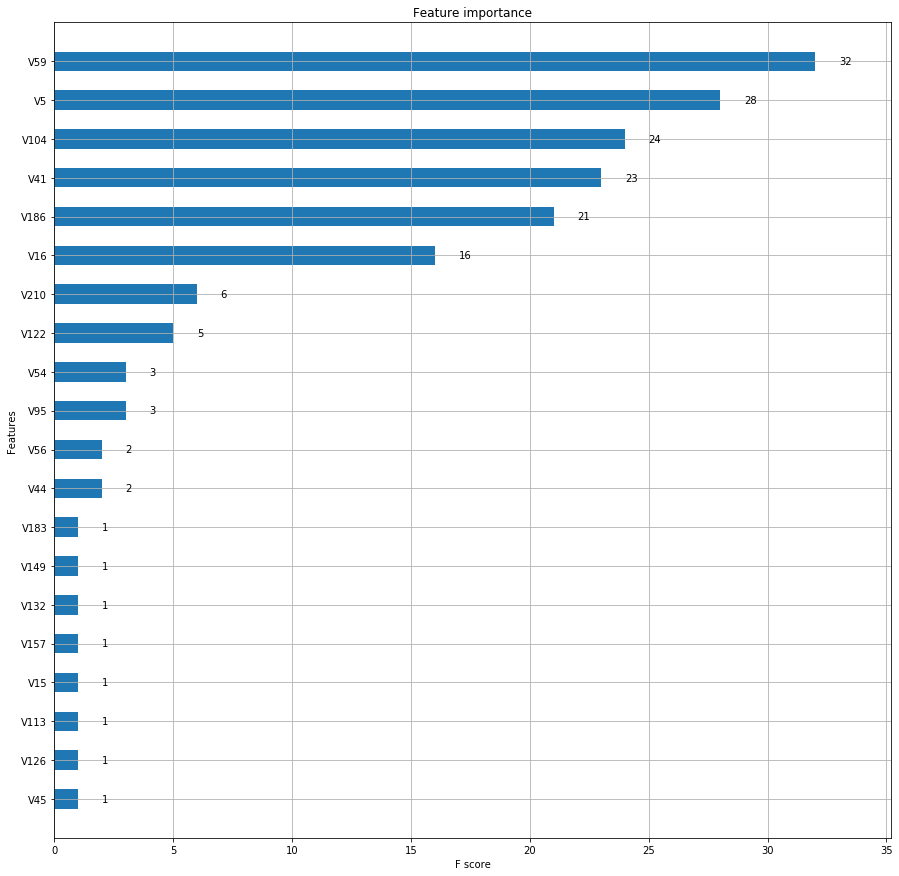

執行時間： 1:47:45.795055 



In [15]:
start = datetime.datetime.now()
df=pd.read_csv("C:/Users/saes0/Desktop/Sensortek/clean_data.csv")
df=df[['V186',"V59","V41","V95","V104","V130",'V113', 'V122', 'V16', 'V138', 'V98', 
      'V44', 'V55', 'V210', 'V5','V185','V174','V184','V144','V157','V175','V53','V39',
      'V15','V126','V86','V56','V149','V180','V40','V127','V89','V85','V8','V45','V183','V142',
      'V6','V129','V171','V147','V152','V134','V172','V151','V84','V116','V19','V54','V137','V123','V132',
      'V154','Result','Class','Flag']]
df =df[df['Class'].isin([1,2,3,4,5,7,11,12])]
x = df.drop(['Result','Class'],axis=1)
y = df['Result']
size_mapping = {'pass':0, 'fail':1}
y = y.map(size_mapping)
x_train1,x_test1,y_train1,y_test = train_test_split(x,y,test_size=0.2,random_state=20190916)
x_train1,x_valid1,y_train,y_valid = train_test_split(x_train1,y_train1,test_size=0.13,random_state=20190916)
x_train,x_valid,x_test = x_train1.drop(['Flag'],axis=1),x_valid1.drop(['Flag'],axis=1),x_test1.drop(['Flag'],axis=1)
print("train, ", Counter(y_train))
print("valid, ", Counter(y_valid))
print("test, ", Counter(y_test))

d_train = xgb.DMatrix(data = np.array(x_train),label = np.array(y_train),feature_names=list(x_train))
d_valid = xgb.DMatrix(data = np.array(x_valid), label = np.array(y_valid), feature_names=list(x_valid))
d_test = xgb.DMatrix(data = np.array(x_test), label = np.array(y_test), feature_names=list(x_test))
counter = Counter(y_train1)
estimate = counter[0] / counter[1]

params = {'booster': 'gbtree',
          'objective': 'binary:logistic',
          'learning_rate': 0.003,
          'subsample': 0.8,
          'colsample_bytree': 0.8,
          'max_depth': 3,
          'min_child_weight': 1,
          'gamma': 0.0,
          'reg_alpha': 0.005,
          'scale_pos_weight': estimate,
          }
cv_model = xgb.cv(params = params, dtrain = d_train, metrics=["logloss"],
           nfold=5, num_boost_round=500, verbose_eval = None,
            early_stopping_rounds=20 , maximize=False)
cn = cv_model.index[-1] #抓幾 round
xgb_model = xgb.train(params, d_train, num_boost_round = cn)
preds_valid = np.round(xgb_model.predict(d_valid),0)
b = confusion_matrix(y_valid,preds_valid)
b_TNR = b[1,1]/sum(b[1])
b_Acc = accuracy_score(y_valid,preds_valid)
print('Original_Scale_pos_weight = ',estimate, 'TNR = ',b_TNR, 'Acc = ', b_Acc )
c=0 ; Diff = [abs(b_TNR-b_Acc)] ; B_TNR = [b_TNR] ; B_ACC = [b_Acc] ; Esi = [estimate]; XGB_model= [xgb_model]; Con_b = [b] 

while (b_TNR < b_Acc):
    estimate = estimate + 3
    params = {'booster': 'gbtree',
              'objective': 'binary:logistic',
              'learning_rate': 0.003,
              'subsample': 0.8,
              'colsample_bytree': 0.8,
              'max_depth': 3,
              'min_child_weight': 1,
              'gamma': 0.0,
              'reg_alpha': 0.005,
              'scale_pos_weight': estimate,
                }

    cv_model = xgb.cv(params = params, dtrain = d_train, metrics=["logloss"],
               nfold=5, num_boost_round=500, verbose_eval = None,early_stopping_rounds=20 , maximize=False)
    cn = cv_model.index[-1] #抓幾 round
    xgb_model = xgb.train(params, d_train, num_boost_round = cn)

    preds_valid = np.round(xgb_model.predict(d_valid),0)
    b=confusion_matrix(y_valid,preds_valid)
    b_Acc = accuracy_score(y_valid,preds_valid)
    b_TNR = b[1,1]/sum(b[1])
    diff = abs(b_TNR-b_Acc)
    print(c+1,'_round_Scale_pos_weight = ',estimate, 'TNR = ',b_TNR, 'Acc = ', b_Acc )
    Diff.append(diff) ; B_TNR.append(b_TNR) ; B_ACC.append(b_Acc) ; Esi.append(estimate) ; XGB_model.append(xgb_model) ; Con_b.append(b) 
    c = c+1
    
    if b_TNR ==0:
        Min_diff_pos = Diff.index(min(Diff))
        preds_train = np.round(XGB_model[Min_diff_pos].predict(d_train),0)
        a = confusion_matrix(y_train,preds_train)
        a_TNR = a[1,1]/sum(a[1])
        a_Acc = accuracy_score(y_train,preds_train)
        preds_test = np.round(XGB_model[Min_diff_pos].predict(d_test),0)
        t = confusion_matrix(y_test,preds_test)
        t_TNR = t[1,1]/sum(t[1])
        t_Acc = accuracy_score(y_test,preds_test)
        print("Min_diff_pos :", Min_diff_pos)
        print('Balanced Estimate: %.3f' % Esi[Min_diff_pos])
        print("\n","Train set :","\n", a ,'\n','TNR = ',a_TNR)
        print("XGB accuracy score: ",round(a_Acc,3))
        print("\n","Valid set :","\n",Con_b[Min_diff_pos] ,'\n','TNR = ',B_TNR[Min_diff_pos])
        print("XGB accuracy score: ",round(B_ACC[Min_diff_pos],3))
        print("\n","Test set :","\n",t,'\n','TNR = ',t_TNR)
        print("XGB accuracy score: ",round(t_Acc,3))
        fig,ax = plt.subplots(figsize=(15,15))
        ax = plot_importance(XGB_model[Min_diff_pos],
                        height=0.5,
                        ax=ax,
                        max_num_features=64)
        plt.show()

        end = datetime.datetime.now()
        print("執行時間：", end - start,"\n")
        break
        
    if  b_TNR >= b_Acc:
            Min_diff_pos = Diff.index(min(Diff))
            preds_train = np.round(XGB_model[Min_diff_pos].predict(d_train),0)
            a = confusion_matrix(y_train,preds_train)
            a_TNR = a[1,1]/sum(a[1])
            a_Acc = accuracy_score(y_train,preds_train)
            preds_test = np.round(XGB_model[Min_diff_pos].predict(d_test),0)
            t = confusion_matrix(y_test,preds_test)
            t_TNR = t[1,1]/sum(t[1])
            t_Acc = accuracy_score(y_test,preds_test)
            print("Min_diff_pos :", Min_diff_pos)
            print('Balanced Estimate: %.3f' % Esi[Min_diff_pos])
            print("\n","Train set :","\n", a ,'\n','TNR = ',a_TNR)
            print("XGB accuracy score: ",round(a_Acc,3))
            print("\n","Valid set :","\n",Con_b[Min_diff_pos] ,'\n','TNR = ',B_TNR[Min_diff_pos])
            print("XGB accuracy score: ",round(B_ACC[Min_diff_pos],3))
            print("\n","Test set :","\n",t,'\n','TNR = ',t_TNR)
            print("XGB accuracy score: ",round(t_Acc,3))
            fig,ax = plt.subplots(figsize=(15,15))
            ax = plot_importance(XGB_model[Min_diff_pos],
                            height=0.5,
                            ax=ax,
                            max_num_features=64)
            plt.show()

            end = datetime.datetime.now()
            print("執行時間：", end - start,"\n")
            break

train,  Counter({'pass': 205938, 'fail': 2255})
test,  Counter({'pass': 51485, 'fail': 564})


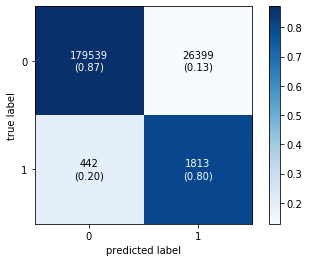

accuracy score:  0.871


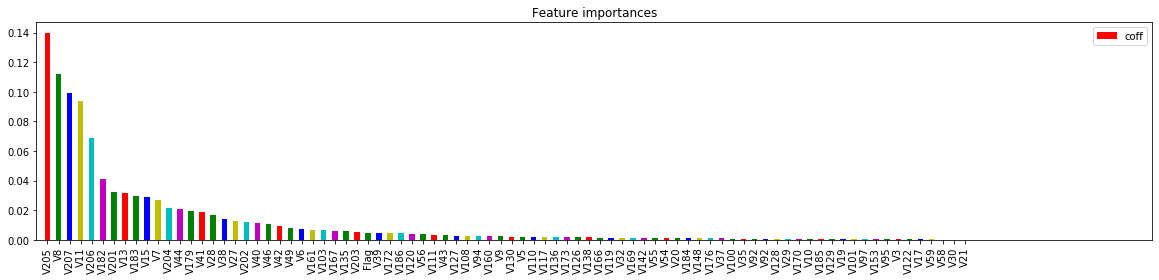

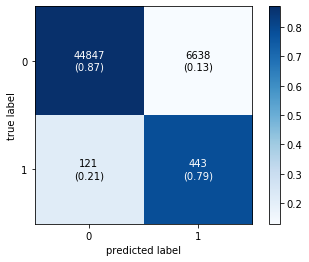

accuracy score:  0.87


In [1]:
#LR
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from collections import Counter
from numpy import sort
from xgboost import plot_importance,XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,mean_squared_error
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from xgboost import plot_importance
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef
import datetime
from sklearn.preprocessing  import StandardScaler
from sklearn.linear_model  import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
#LR
df=pd.read_csv("C:/Users/saes0/Desktop/Sensortek/clean_data.csv")
df=df[['V41','V44','V8','V10','V19','V43','V11','V7','V39','V100','V186','V32','V38', 
      'V117', 'V128', 'V9', 'V101','V167','V148','V40','V119','V183','V120','V94','V103',
      'V111','V207','V135','V5','V55','V182','V17','V92','V129','V15','V201','V160','V136',
      'V110','V142','V172','V173','V92','V58','V21','V29','V184','V161','V126','V56','V3','V176','V169',
      'V130','V59','V166','V185','V122','V170','V97','V54','V42','V95','V138','V153','V37','V28',
       'V20','V49','V27','V30','V46','V179','V13','V6','V127','V205','V206','V35','V204',
       'V202','V203','V108','Result','Class','Flag']]
x = df.drop(['Result','Class'],axis=1)
y = df['Result']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20190916)
sc=StandardScaler()
sc.fit(x_train)
x_train_nor=sc.transform(x_train)
x_test_nor=sc.transform(x_test)
print("train, ", Counter(y_train))
print("test, ", Counter(y_test))
lr=LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lr.fit(x_train_nor,y_train)
labels=['pass','fail']
cnf=confusion_matrix(y_train,lr.predict(x_train_nor),labels=labels)
fig, ax = plot_confusion_matrix(conf_mat=cnf,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()
print("accuracy score: ",round(accuracy_score(y_train,lr.predict(x_train_nor)),3))

feature_importance=pd.DataFrame(lr.coef_)
feature_importance.columns=x.columns
a = abs(feature_importance.T)
a.rename(columns = {0: "coff"},inplace = True)
Sort=a.sort_values(by='coff',ascending=False)
Percent_S=Sort/sum(Sort['coff'])
Percent_S.head()
Percent_S.head(100).plot.bar(figsize=(20,4),color='rgbycmg')#V15[52] The 53rd columns
plt.title("Feature importances")
plt.xlim((-1, 100))

labels=['pass','fail']
cnf=confusion_matrix(y_test,lr.predict(x_test_nor),labels=labels)
fig, ax = plot_confusion_matrix(conf_mat=cnf,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()
print("accuracy score: ",round(accuracy_score(y_test,lr.predict(x_test_nor)),3))